# Data Summaries

Для того чтобы получить поверхностную итоговую информацию по данным в pandas существуют специальный метод с параметрами.

Данный параметр называется **describe()**

Если не указывать никаких параметров то данный метод посчитает сводную информацию по числовым значениям

Но также он может сделать это и для категорийных переменных для этого указывается параметр **include** которому присваивается строковое значение **'all'**

In [1]:
# давайте посмотрим как это работает
import pandas as pd
pd.set_option('display.expand_frame_repr', None)

movies = pd.read_csv('./files/netflix_movies.csv', index_col=0)

print(movies.head())

      type            title         country release_year rating  duration
0    Movie  Norm of the ...   United States      missing     PG    91.071
1    Movie  Jandino: Wha...  United Kingdom         2016      R    94.516
2  TV Show  Transformers...   United States         2013      G     1.127
3  TV Show  Transformers...   United States         2016  TV-14     1.687
4    Movie  #realityhigh...   United States         2017  TV-14    99.248


In [2]:
# используя метод describe выведите на экран сводную информацию по числовым параметрам
print(movies.describe())
# если помните то из числовых переменных в данном наборе было только колонка duration
# потому как колонка release_year содержала в себе строковую данную вместо числа

          duration
count  6234.000000
mean     68.983492
std      50.867301
min       1.001000
25%       2.926250
50%      87.272500
75%     105.893000
max     312.970000


In [3]:
# отобразите сводную информацию включая категорийные переменные
print(movies.describe(include='all'))

         type            title        country release_year rating     duration
count    6234             6234           5758         6234   6224  6234.000000
unique      2             5732             72           73      7          NaN
top     Movie  Power Ranger...  United States         2018      R          NaN
freq     4265               30           2302         1063   2753          NaN
mean      NaN              NaN            NaN          NaN    NaN    68.983492
std       NaN              NaN            NaN          NaN    NaN    50.867301
min       NaN              NaN            NaN          NaN    NaN     1.001000
25%       NaN              NaN            NaN          NaN    NaN     2.926250
50%       NaN              NaN            NaN          NaN    NaN    87.272500
75%       NaN              NaN            NaN          NaN    NaN   105.893000
max       NaN              NaN            NaN          NaN    NaN   312.970000


## Центральная тенденция числовых данных

Говоря о числовых данных мы не редко хотим описать центральную тенденцию, или "типичные" значения переменных. Например, какова типичная цента аренды квартиры в Нью-Йорке?

Существует несолько наиболее часто встречаемых измерений центральной тенденции:
- mean - среднее значение, рассчитывается как сумма всех значений разделенное на кол-во значений
- median - значение которое представляет собой середину отсортированных значений
- mode - наиболее часто встречаемое значения переменной
- Trimmed mean - среднее значения не включая некоторый процент от самого низкого и высокого значений

Для практического ознакомления с данными измерения используйте набор данных ./files/movies.csv

In [4]:
movies = pd.read_csv('./files/movies.csv')

print(movies.head())

                              movie  production_budget  domestic_gross  worldwide_gross mpaa_rating      genre
0                     Evan Almighty        175000000.0     100289690.0     1.741313e+08          PG     Comedy
1                        Waterworld        175000000.0      88246220.0     2.642462e+08       PG-13     Action
2  King Arthur: Legend of the Sword        175000000.0      39175066.0     1.399507e+08       PG-13  Adventure
3                          47 Ronin        175000000.0      38362475.0     1.517168e+08       PG-13     Action
4    Jurassic World: Fallen Kingdom        170000000.0     416769345.0     1.304866e+09       PG-13     Action


In [5]:
# вычислите среднее значение колонки production_budget и сохраните в переменную mean_budget
# выведите результат на экран

mean_budget = movies.production_budget.mean()

print(mean_budget)

33284743.23640106


In [6]:
# вычислите медианное значение той же колонки
print(movies.production_budget.median())

20000000.0


In [7]:
# выведите значение mode
print(movies.production_budget.mode())

0    20000000.0
Name: production_budget, dtype: float64


In [8]:
# выведите на экран значение trimmed mean
from scipy.stats import trim_mean

print(trim_mean(movies.production_budget, proportiontocut=0.2))

23949546.79078883


## Разброс числовых данных Spread of Quantitative Data

Для более глубокого понимания числовых значений используются специальные метрики описывающие определенные показатели к таким метрикам относятся
- range - диапазон, рассчитыватеся как разнциа между максимальным и минимальным значениями
- IQR (interqartile range) - межквартильный диапазон, рассчитывается как разница между 1 и 3 квартилями
- variance - среднее значение квадратов расстояний от каждой значения до среднего
- standart daviation (SD) - стандартное отклонение, рассчитывается как квадратный корень из variance
- mean absolute deviation (mad) - среднее абсолютное значение расстояний между каждой точкой и средним значением

In [9]:
# давайте рассчитываем все выше перечисленные показатели на примере набора данных movies
# все вычисления будем применять к колонке production_budget
# библиотека pandas не имеет внутреннего метода mad поэтому я написал его и сохранил в файле modules
import modules

range_budget = movies.production_budget.max() - movies.production_budget.min()
print(range_budget)

iqr_budget = movies.production_budget.quantile(0.75) - movies.production_budget.quantile(0.25)
print(iqr_budget)

var_budget = movies.production_budget.var()
print(var_budget)

sd_budget = movies.production_budget.std()
print(sd_budget)

mad_budget = modules.mad(movies.production_budget)
print(mad_budget)


174750000.0
36000000.0
1217478921139147.8
34892390.5907742
26090426.818845242


## Визуализация числовых значений

Расчет числовых показателей дает много знаний о данных но визальное представление облегчает ее восприятие

Для визуализации данных используются библиотеки matplotlib и seaborn

Существует множество видом графиков и способов отображения числовой информации вот одни из них:
- boxplot() - коробочная диаграмма
- histplot() - гистограмма

Рассмотрим применение далее на примере

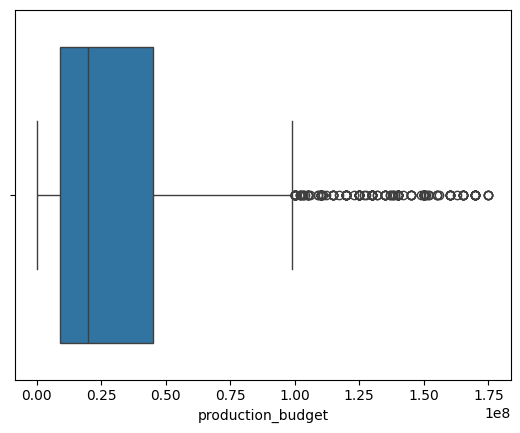

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# для того чтобы отобразить коробочную диаграмму используется одноименный метод библиотеки seaborn
sns.boxplot(x='production_budget', data=movies)
plt.show()
plt.close()

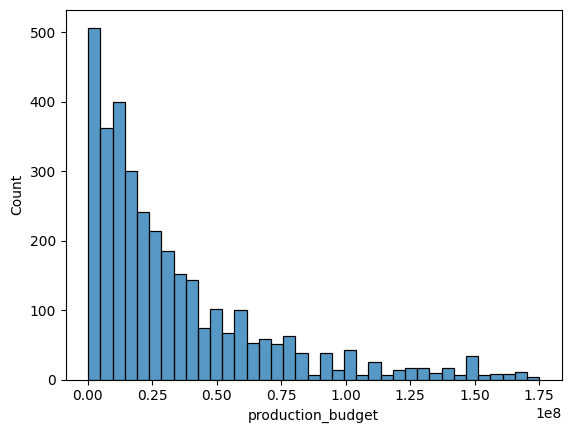

In [11]:
# гистограмма вызывается таким же образом при вызове специального метода
sns.histplot(x='production_budget', data=movies)
plt.show()
plt.close()

## Подсчет значений категорийных данных

Так как данные такого типа в основном содержат информацию в строковом виде в таком случае подсчитать показатели как для числовых данных является невозможным.

Но мы можем подсчитать кол-во значений в параменной и вычислить их долю от общего числа

Достигается это путем использования метода **value_counts()**

In [13]:
# давайте посчитаем сколько фильмов в каком жанре сняты используя описанный метод
print(movies.genre.value_counts())

genre
Drama        1236
Comedy        813
Action        573
Adventure     481
Horror        298
Name: count, dtype: int64


Судя по полученному результату можно сделать вывод что большинство фильмов было снято в жанре Drama далее идут Comedy и Action

In [14]:
# как и говорилось ранее мы можем рассчитать пропорции каждого значения категорийных данных сделать это просто
# достаточно разделить каждое значение полученного набора на всю длину набора

print(movies.genre.value_counts() / len(movies))

genre
Drama        0.363423
Comedy       0.239047
Action       0.168480
Adventure    0.141429
Horror       0.087621
Name: count, dtype: float64


Таким образом мы получили требуемые значение но есть и более удобный способ получить такие же значения использовав параметр normalize=True метода value_counts()

In [15]:
print(movies.genre.value_counts(normalize=True))

genre
Drama        0.363423
Comedy       0.239047
Action       0.168480
Adventure    0.141429
Horror       0.087621
Name: proportion, dtype: float64


## Визуализация категорийных данных

Для визуализации такого типа данных используют
- график счета (countplot) - является методом библиотеки seaborn
- пирог (pie) - является методом plot функции values_counts()

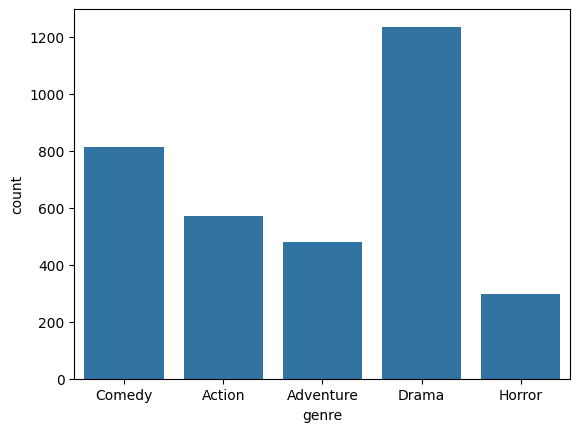

In [16]:
sns.countplot(x='genre', data=movies)
plt.show()
plt.close()

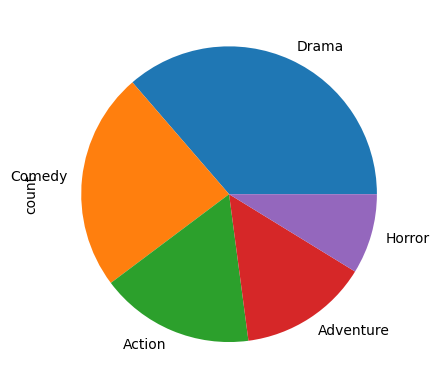

In [17]:
movies.genre.value_counts().plot.pie()
plt.show()
plt.close()